# Use user defined pseudotime

CAPITAL can now also use pseudotime that are calculated in other methods.  

In [1]:
import capital as cp
import scanpy as sc
import numpy as np

In this tutorial, we will use the same datasets as previous tutorial.  

In [2]:
adata1 = cp.dataset.setty19()

The dataset already exist in ../data/capital_dataset/setty19_capital.h5ad.
Reading datasets from ../data/capital_dataset/setty19_capital.h5ad.


In [3]:
adata1

AnnData object with n_obs × n_vars = 5780 × 1999
    obs: 'n_genes', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'diffmap_evals', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Calculating Diffusion Pseudotime using scanpy. This can be replaced by other methods, which can be implemented in your own preprocessing steps.

In [4]:
adata1.uns['iroot'] = np.flatnonzero(adata1.obs['leiden'] == '4')[0]
sc.tl.dpt(adata1)

Now, pseudotime is stored in adata.obs

In [5]:
adata1.obs

,n_genes,leiden,dpt_pseudotime
index,,,
Run4_120703408880541,1697,1,0.660055
Run4_120703409056541,1097,7,0.103425
Run4_120703409580963,834,8,0.614602
Run4_120703423990708,994,8,0.609378
Run4_120703424252854,2277,19,0.507636
...,...,...,...
Run5_241114589051630,2802,11,0.922035
Run5_241114589051819,1695,10,0.474332
Run5_241114589128940,2131,5,0.510828


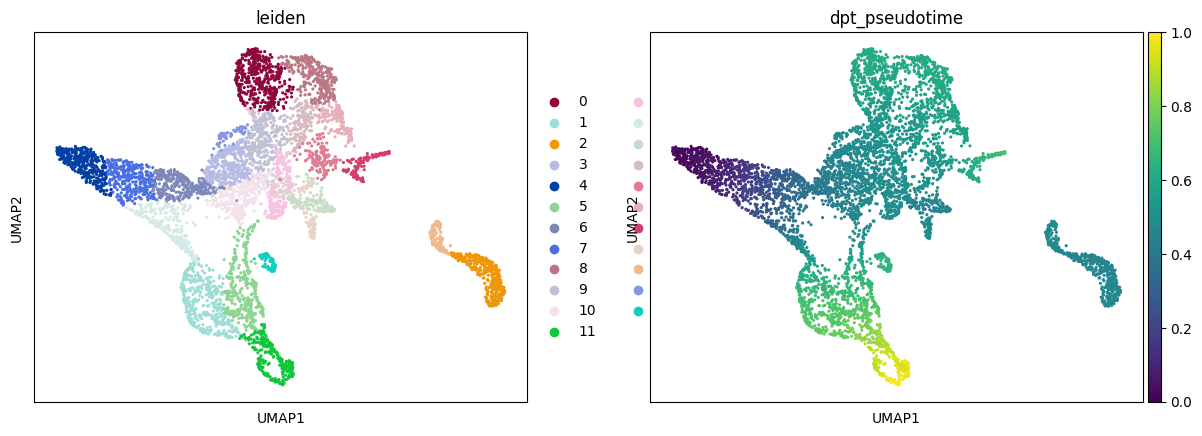

In [6]:
sc.pl.umap(adata1, color=["leiden", "dpt_pseudotime"])

Apply the same process to one or more datasets that you would like to align.

In [7]:
adata2 = cp.dataset.velten17()

The dataset already exist in ../data/capital_dataset/velten17_capital.h5ad.
Reading datasets from ../data/capital_dataset/velten17_capital.h5ad.


In [8]:
adata2.uns['iroot'] = np.flatnonzero(adata2.obs['leiden'] == '0')[0]
sc.tl.dpt(adata2)

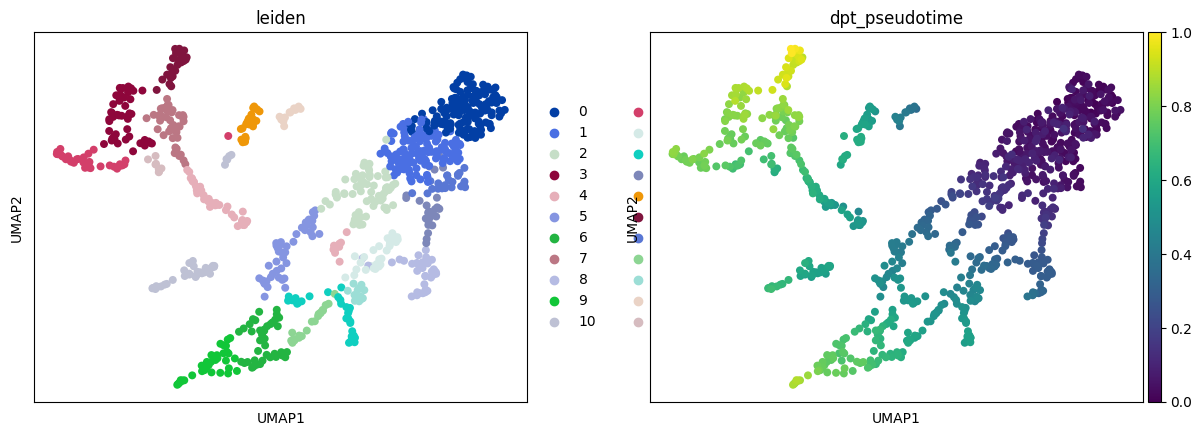

In [9]:
sc.pl.umap(adata2, color=["leiden", "dpt_pseudotime"])

## Aligning trajectory trees

In [10]:
cp.tl.trajectory_tree(adata1, root_node="4", groupby="leiden", tree=None)

In [11]:
cp.tl.trajectory_tree(adata2, root_node="0", groupby="leiden", tree=None)

In [12]:
cdata = cp.tl.tree_alignment(adata1, adata2, num_genes1=2000, num_genes2=2000)

Calculating tree alignment
411 genes are used to calculate cost of tree alignment.

Calculation finished.


Draw the tree alignment result.

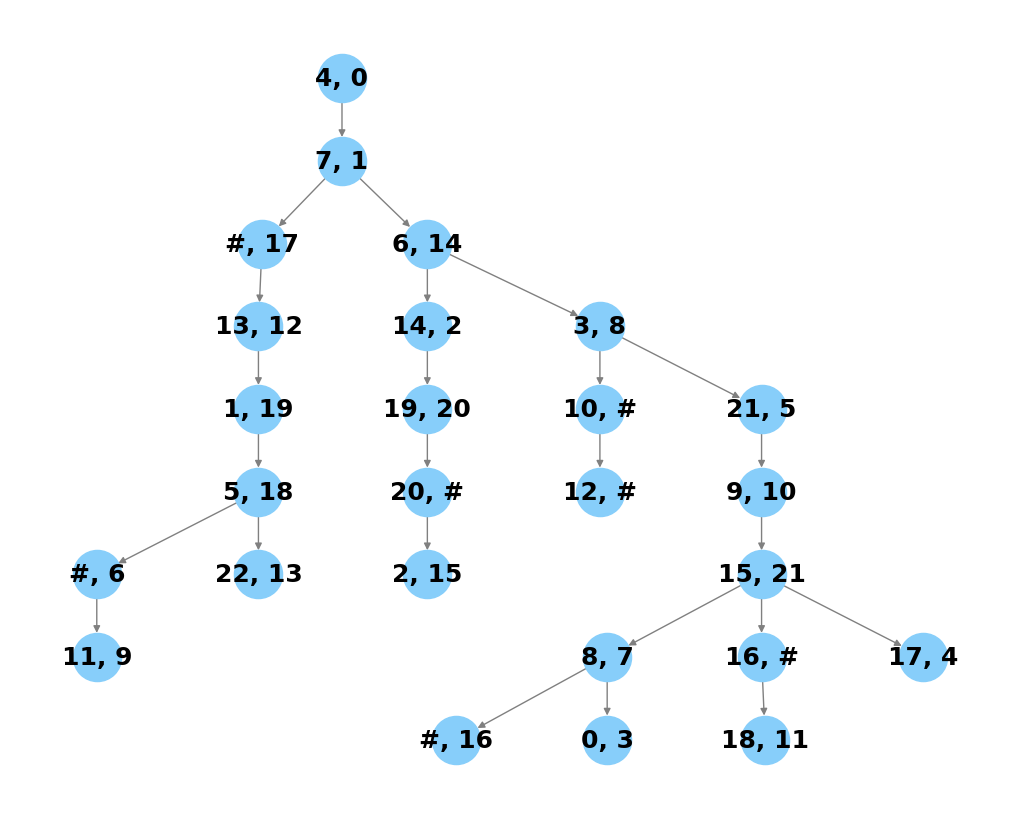

In [13]:
cp.pl.tree_alignment(cdata)

## Applying preprocessed pseudotime for dynamic time warping
Specify the name of the column which stores pseudotime and the preprocessed pseudotime will be used in downstream analysis. 

In [14]:
cp.tl.dtw(cdata, gene=cdata.genes_for_tree_align, multi_genes=True, pseudotime="dpt_pseudotime")

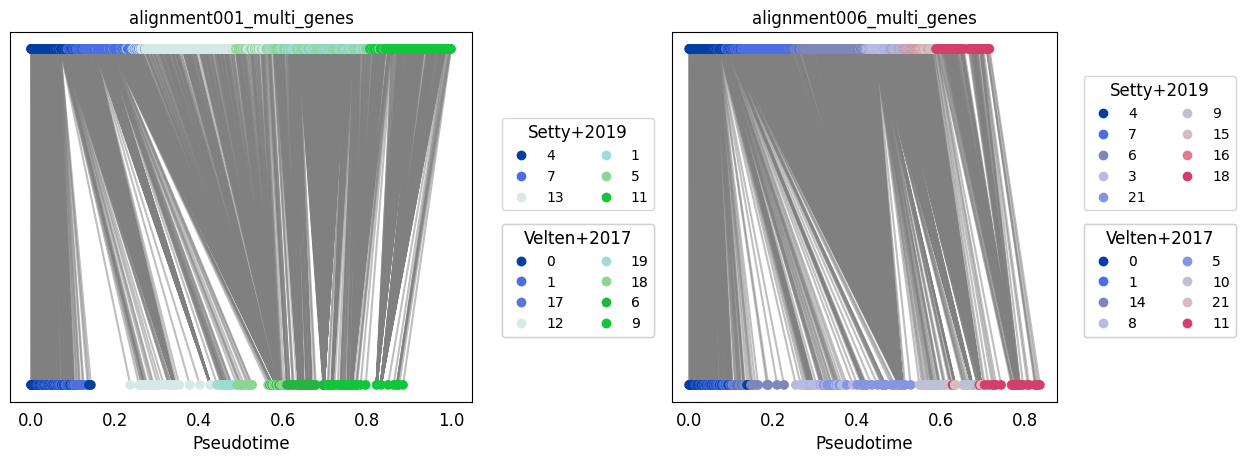

In [15]:
cp.pl.dtw(cdata, gene=["multi_genes"], alignment=["alignment001", "alignment006"], col_pseudotime="dpt_pseudotime",
          data1_name="Setty+2019", data2_name="Velten+2017")

In [16]:
main_markers = [
        ["alignment000", "ITGA2B"],
        ["alignment006", "LGMN"]
     ]

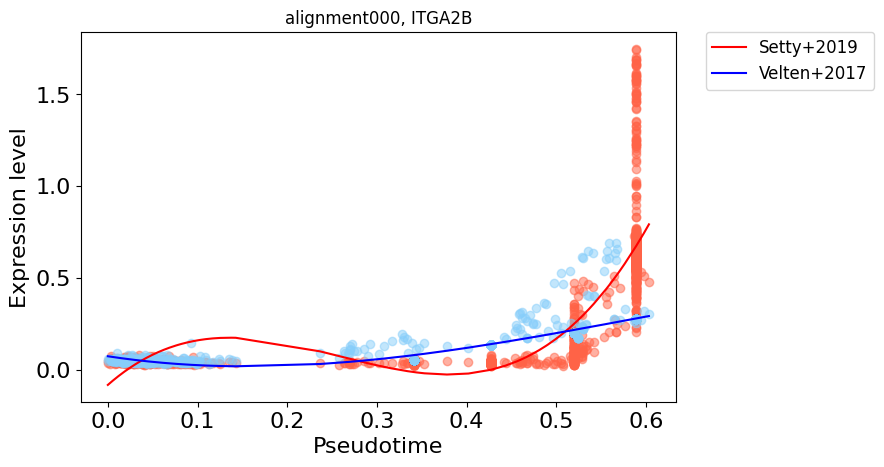

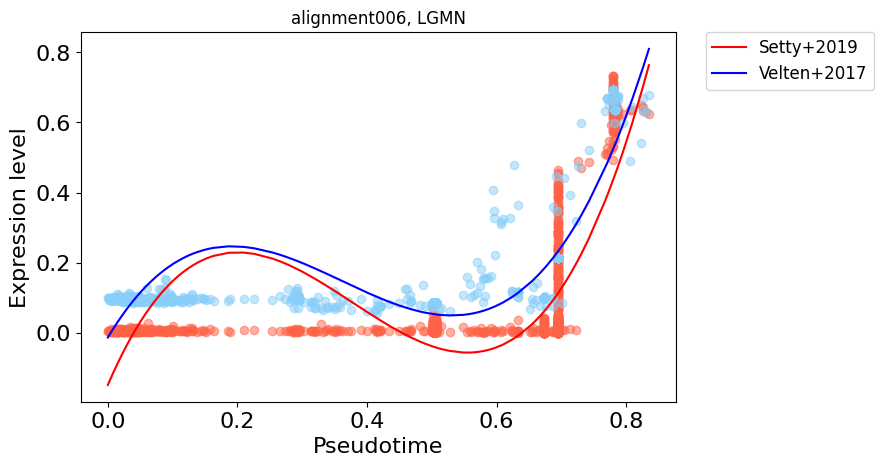

In [17]:
for alignment, gene in main_markers:
    cp.pl.gene_expression_trend(
        cdata, gene=gene, alignment=alignment, fontsize=16, ticksize=16, multi_genes=True, col_pseudotime="dpt_pseudotime",
        switch_psedotime=True,data1_name="Setty+2019", data2_name="Velten+2017", polyfit_dimension=3
    )